# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Slope (Heating Rate): 0.942 °C/min
Slope (SI units): 0.01570 K/s


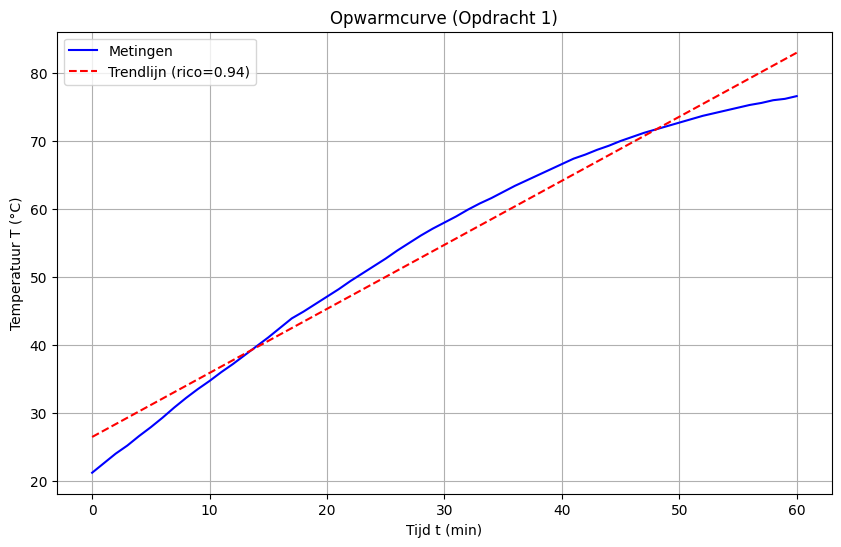

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
file_path = 'tempmetingen-733121424db047611d1756851296ade6.csv'
df = pd.read_csv(file_path, delimiter=';')

# 2. Prepare Data
# Rename columns for easier access if necessary, usually index 0 is time, 1 is temp
t_min = df.iloc[:, 0]
T_celsius = df.iloc[:, 1]

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_min, T_celsius, 'b-', label='Metingen')
plt.title('Opwarmcurve (Opdracht 1)')
plt.xlabel('Tijd t (min)')
plt.ylabel('Temperatuur T (°C)')
plt.grid(True)

# 4. Calculate Slope (Linear Regression)
# We select the linear part, e.g., from t=0 to t=70 (before boiling starts)
linear_part = df[df.iloc[:, 0] <= 70] 
coef = np.polyfit(linear_part.iloc[:, 0], linear_part.iloc[:, 1], 1)
slope_min = coef[0] # degrees per minute
slope_sec = slope_min / 60 # degrees per second

print(f"Slope (Heating Rate): {slope_min:.3f} °C/min")
print(f"Slope (SI units): {slope_sec:.5f} K/s")

# Add trendline to plot
plt.plot(t_min, coef[0]*t_min + coef[1], 'r--', label=f'Trendlijn (rico={slope_min:.2f})')
plt.legend()
plt.show()